## Lab09_Arvore_Decisao_02

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

* Sérgio Wilson Rosa Brito
* Charles Rodrigues Magalhães
* Julio Luiz dos Reis Filho

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/)

# Exercício 9.2 - Criando uma árvore de decisão para prever empréstimos pessoais

Baixe o arquivo Bank_Personal_Loan_Modelling.csv a partir do link https://drive.google.com/file/d/1UbTqmbtPCoMqsY9fbQ5tuXK4GZe1gVXm/view?usp=drive_link

Vamos colocar esse arquivo no Google Drive na pasta /arquivos_colab/Lab09 e ler o CSV para criar um novo DataFrame do Pandas.

Faça o tratamento de dados que julgar necessário.

Crie um modelo de classificação utilizando árvore de decisão para a coluna "Personal Loan", que indica se a pessoa contratou um empréstimo pessoal.

Separe os dados em conjuntos para treino e teste. Para os dados de teste imprima a matriz de confusão e métricas do modelo.



In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
# Execute esta célula para montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Verificando se o arquivo está na pasta
%cd /content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab09
%ls -la

/content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab09
total 2161
-rw------- 1 root root  211884 Nov  8 23:10 Bank_Personal_Loan_Modelling.csv
-rw------- 1 root root 1182128 Nov 15 19:49 Lab09_Arvore_Decisao_01.ipynb
-rw------- 1 root root  699965 Nov 15 19:48 Lab09_Arvore_Decisao_02.ipynb
-rw------- 1 root root  117743 Nov  8 23:09 Titanic.csv


In [4]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv', na_values='?')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Vamos verificar se existem valores nulos
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: >

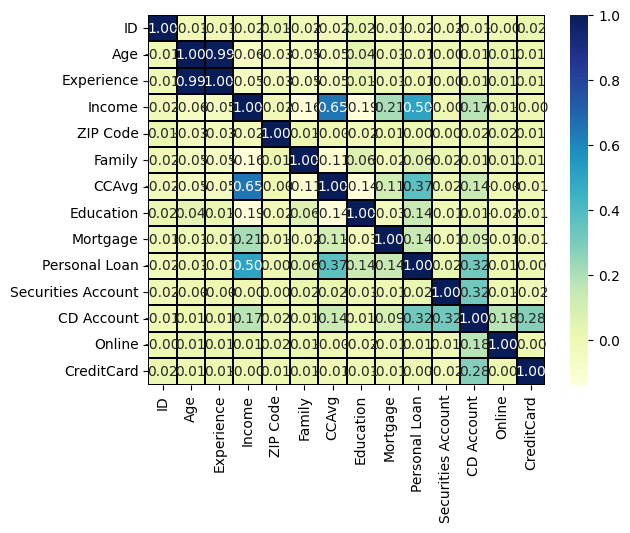

In [7]:
# Plotando a correlação de outra forma, com um mapa de calor
sns.heatmap(df.corr(), robust=True, fmt=".2f", cmap='YlGnBu',annot=True, linewidths=0.01, linecolor='black')

In [8]:
# Removendo colunas que não serão utilizadas no modelo
df = df.drop(['Age','Experience','Family','Online','Education','CreditCard','ID', 'ZIP Code'], axis=1)

<Axes: >

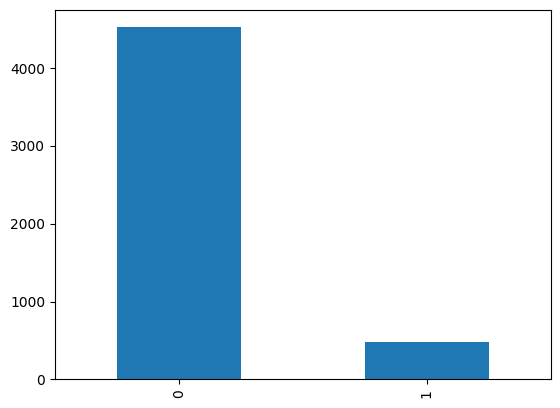

In [9]:
# Distribuição do target
df['Personal Loan'].value_counts().plot.bar()

In [10]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].values

In [11]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(5000, 5)
(5000,)


In [12]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (4000, 5)
y_train: (4000,)
X_test: (1000, 5)
y_test: (1000,)


In [13]:
!pip install scikit-plot

---MÉTRICAS DE DESEMPENHO---
Accuracy:     [ 0.860  0.860]
Precision:    [ 0.951  0.324]
Recall:       [ 0.892  0.528]
Specificity:  [ 0.324  0.951]
Sensitivity:  [ 0.892  0.528]
---REPORT---
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       911
           1       0.32      0.53      0.40        89

    accuracy                           0.86      1000
   macro avg       0.64      0.71      0.66      1000
weighted avg       0.90      0.86      0.87      1000

---MEDIDAS DE DESEMPENHO---
Accuracy: 0.86
Precision: 0.8950973986690864
Recall: 0.86
F1 Score: 0.8745324312028727
ROC AUC: 0.7851909865686553


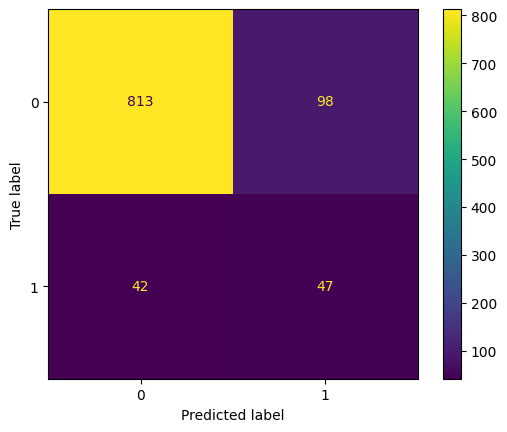

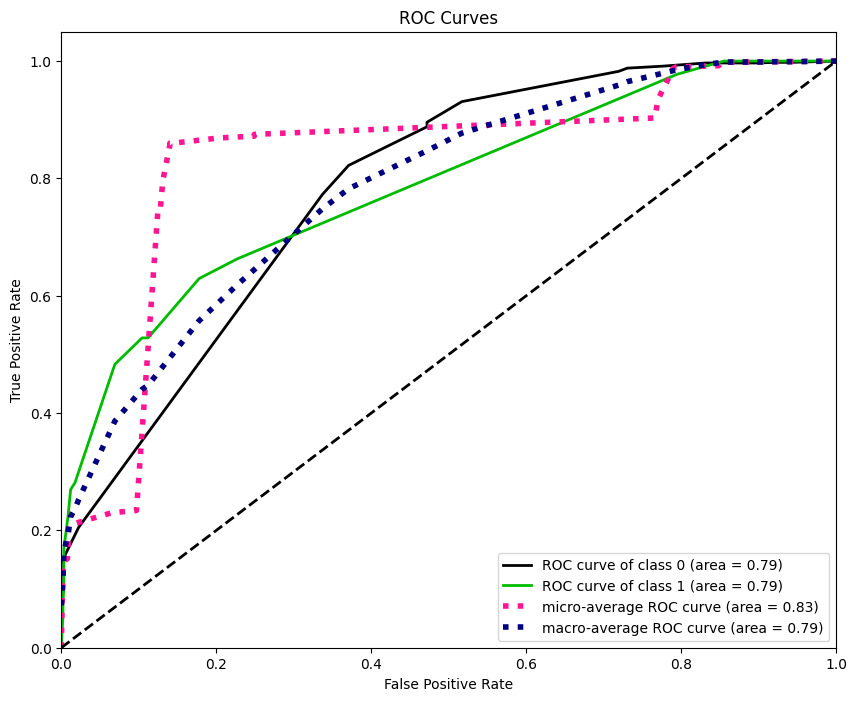

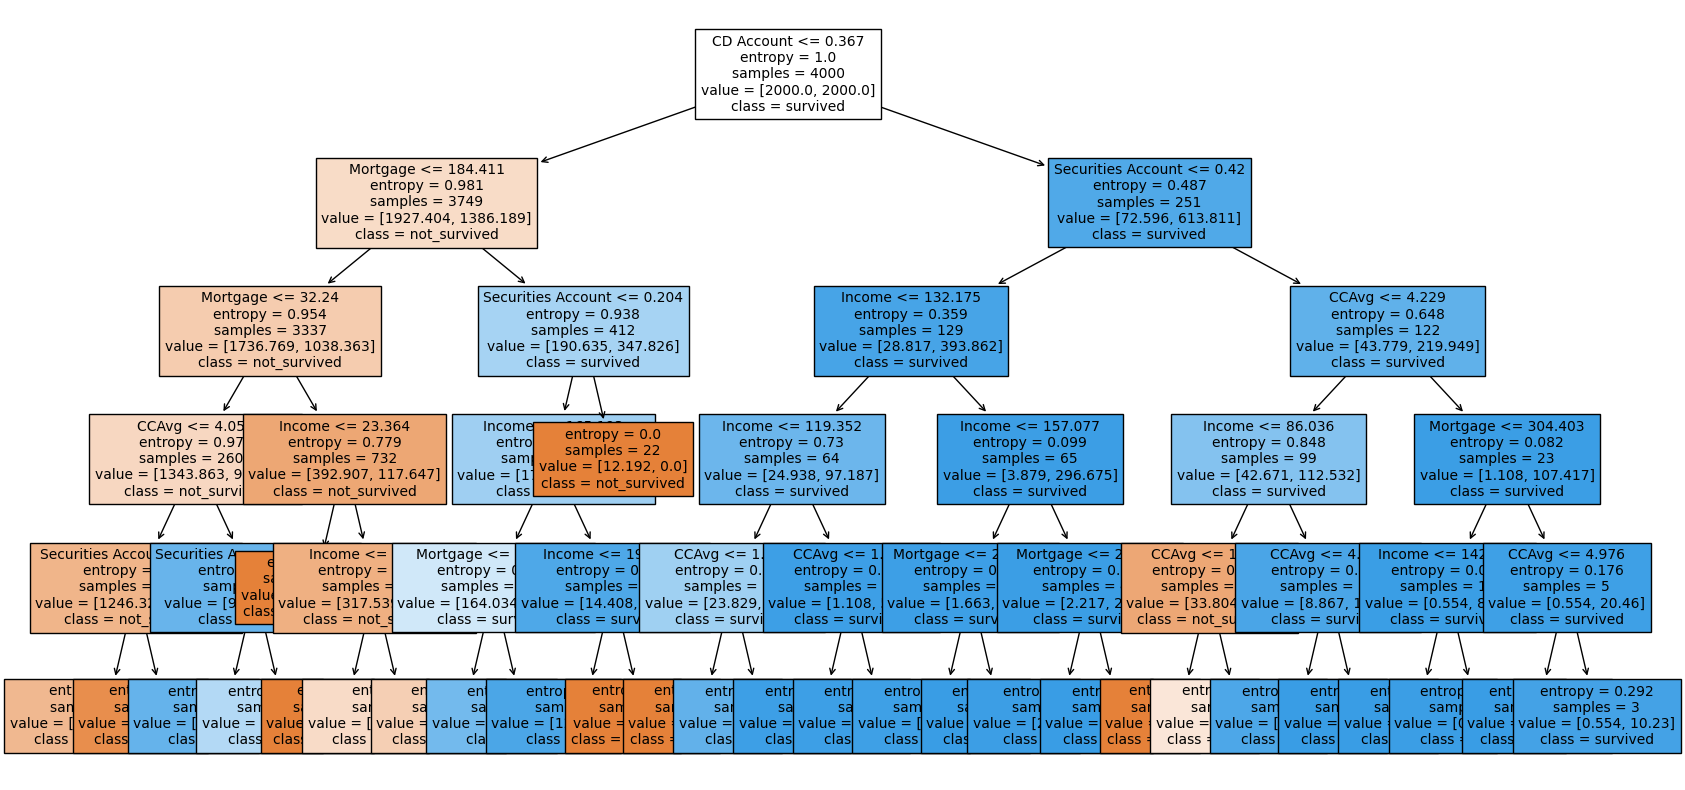

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    param_grid = {
      'criterion': ["gini", "entropy", "log_loss"],
      'max_depth': [5],
      'splitter': ["best", "random"],
      'max_features': ["auto", "sqrt", "log2","none"],
      'class_weight': ["dict","balanced","none"]
    }

    treeModel = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
    treeModel.fit(X_train, y_train)

    # Prevendo valores para X_test
    y_pred = treeModel.predict(X_test)

    # Imprimindo a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=treeModel.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=treeModel.classes_)
    disp.plot()

    # Calculando as métricas
    print("---MÉTRICAS DE DESEMPENHO---")
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("Accuracy:    ", (tp + tn) / (tp + tn + fp + fn))
    print("Precision:   ", tp / (tp + fp))
    print("Recall:      ", tp / (tp + fn))
    print("Specificity: ", tn / (tn + fn))
    print("Sensitivity: ", tp / (tp + fn))

    # Medidas de desempenho
    print("---REPORT---")
    print(classification_report(y_test, y_pred))
    print("---MEDIDAS DE DESEMPENHO---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("ROC AUC:", roc_auc_score(y_test, treeModel.predict_proba(X_test)[:,1]))

    # Plotando a curva ROC para os dados de teste
    y_probas = treeModel.predict_proba(X_test)
    plot_roc(y_test, y_probas, figsize=(10, 8))
    plt.show()

    # Plotando a árvore de decisão criada
    plt.figure(figsize=(20,10))
    plot_tree(treeModel.best_estimator_, filled=True, fontsize=10,feature_names=X.columns,class_names=['not_survived','survived'])
    plt.show()